# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0304 Гурьянов Савелий, Никитин Дмитрий. Вариант №4.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения
#### Дискретный сигнал
Дискретный сигнал является результатом дискретизации аналогового сигнала $s(t)$.

Аналоговый сигнал:
$$s(t) = \sum_{k=0}^{N-1} A_k cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:
$$x_k = s(t_k), k=0...N-1$$

Шаг дискретизации:
$$T = t_k - t_{k-1} = 1$$
#### Спектр дискретного сигнала
Пусть дискретный сигнал задан как функция от времени.
$$s(t) = \sum_{k=-\infty}^{\infty} x_k \delta(t - k)$$
Тогда результат преобразования Фурье - спектр дискретного сигнала, являющийся периодической функцей с периодом $2\pi$.
$$S(\omega) = \sum_{k=-\infty}^{\infty} x_k e^{-i\omega k}$$

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

#### 1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

Аналоговый сигнал:
$$s(t) = \sum_{k=0}^{10} A_k cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:
$$x_k = s(t_k), k=0...31$$

Шаг дискретизации:
$$T = t_k - t_{k-1} = 1$$

In [75]:
from math import pi
import random
import numpy as np
N = 31
T = 1
w = [i * pi/10 for i in range(11)]
A = [random.randint(1, 12) for i in range(11)]
sum = 0
for x in A:
    sum += x
for i in range(len(A)):
    A[i] /= sum
fi = [random.random()/2 for i in range(11)]
print(w)
print(A)
print(fi)

[0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
[0.10526315789473684, 0.19298245614035087, 0.07017543859649122, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.10526315789473684, 0.07017543859649122, 0.05263157894736842, 0.03508771929824561, 0.21052631578947367]
[0.20928726902105305, 0.05297350883539764, 0.26948034512603253, 0.21727207551599065, 0.27560281606198067, 0.02088460407362641, 0.38209363494052223, 0.32399547594716893, 0.09227537697647986, 0.44634579271747693, 0.4297115514595072]


#### 2. Визуализировать исходные аналоговый и дискретизированный сигналы.

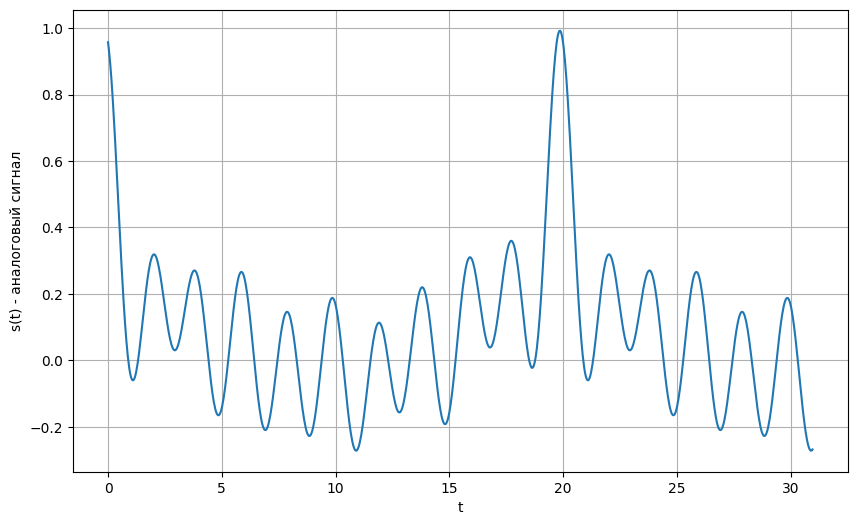

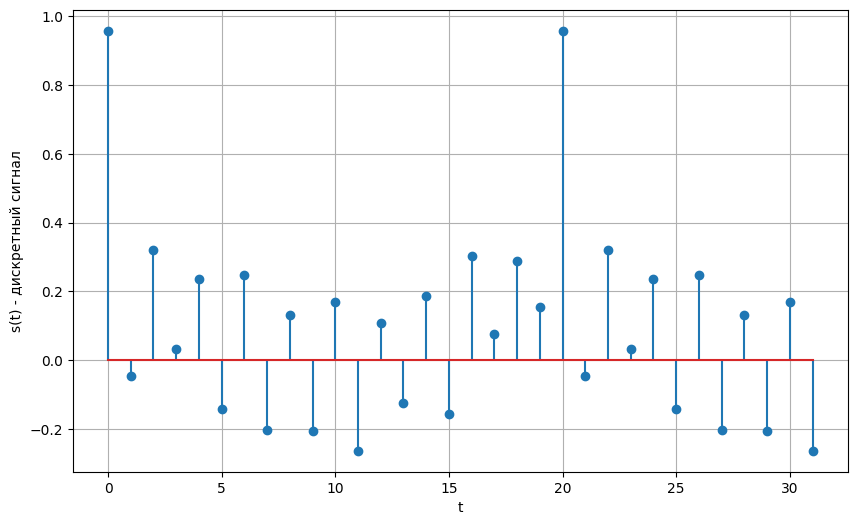

In [76]:
from math import cos
import matplotlib.pyplot as plt
t_analog = [i*N/1000 for i in range(1000)]
t_discrete = range(0, N + T, T)
def signal(t):
    result = 0
    for i in range(11):
        result += A[i] * cos(w[i] * t + fi[i])
    return result


plt.figure(figsize=(10, 6))
plt.plot(t_analog, [signal(t) for t in t_analog])
plt.ylabel("s(t) - аналоговый сигнал")
plt.xlabel("t")
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.stem(t_discrete, [signal(t) for t in t_discrete])
plt.ylabel("s(t) - дискретный сигнал")
plt.xlabel("t")
plt.grid()
plt.show()

#### 3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

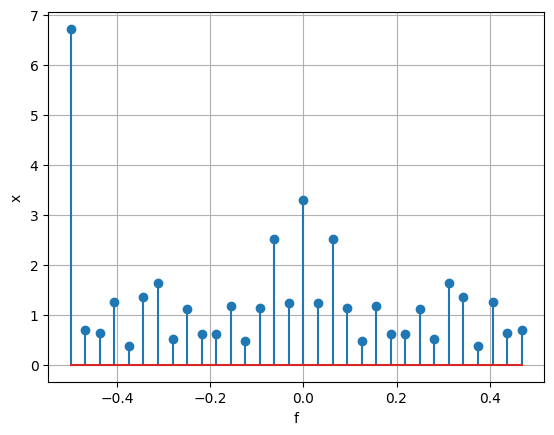

In [77]:
from scipy.fft import fftfreq
def furie(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

f = fftfreq(N + 1, T)
x = np.abs(furie([signal(t) for t in t_discrete]))
plt.stem(f, x)
plt.ylabel("x")
plt.xlabel("f")
plt.grid()
plt.show()

Спектр является периодической функцией и симметричен относительно точки 0.

#### 4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Передаточные функции для линейного сглаживания по 5-ти и 9-ти точкам:

$H_5(\omega)=\frac{1}{5}(1 + 2cos(\omega)+2cos(2\omega))$

$H_9(\omega)=\frac{1}{9}(1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega))$

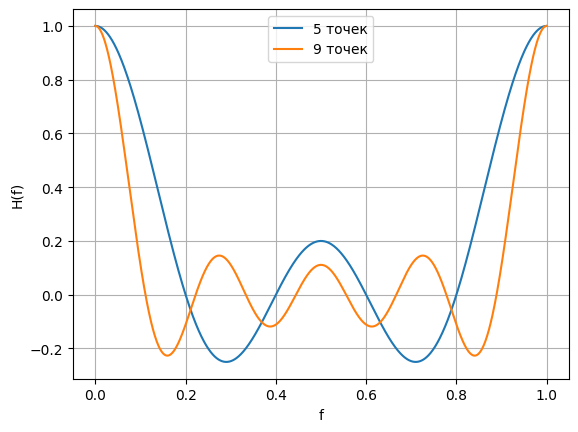

In [78]:
from math import cos

def h(f, value):
    match value:
      case 5:
        return (1 + 2*cos(2*pi * f) + 2*cos(4*pi*f)) / 5
      case 9:
        return (1 + 2*cos(2*pi * f) + 2*cos(4*pi*f) + 2 * cos(6*pi*f) + 2*cos(8*pi*f)) / 9

f = [i / 1000 for i in range(1000)]


plt.plot(f, [h(f_, 5) for f_ in f], label="5 точек")
plt.plot(f, [h(f_, 9) for f_ in f], label="9 точек")

plt.ylabel("H(f)")
plt.xlabel("f")

plt.legend()
plt.grid()
plt.show()

#### 5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

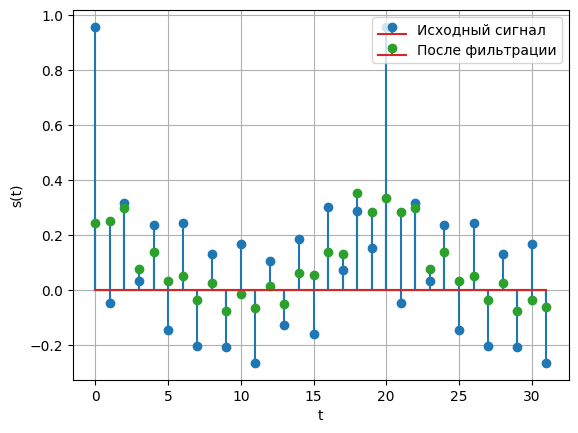

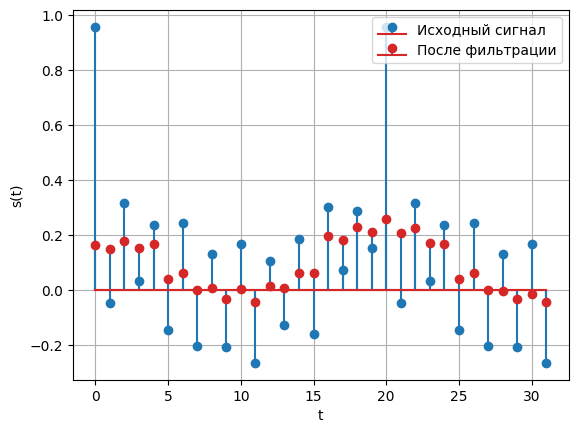

In [79]:
s = [signal(t) for t in t_discrete]
s5 = np.convolve(s, np.ones(5), 'same') / 5
s9 = np.convolve(s, np.ones(9), 'same') / 9

plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s5, label="После фильтрации", markerfmt="C2o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()


plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, s9, label="После фильтрации", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

#### 6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

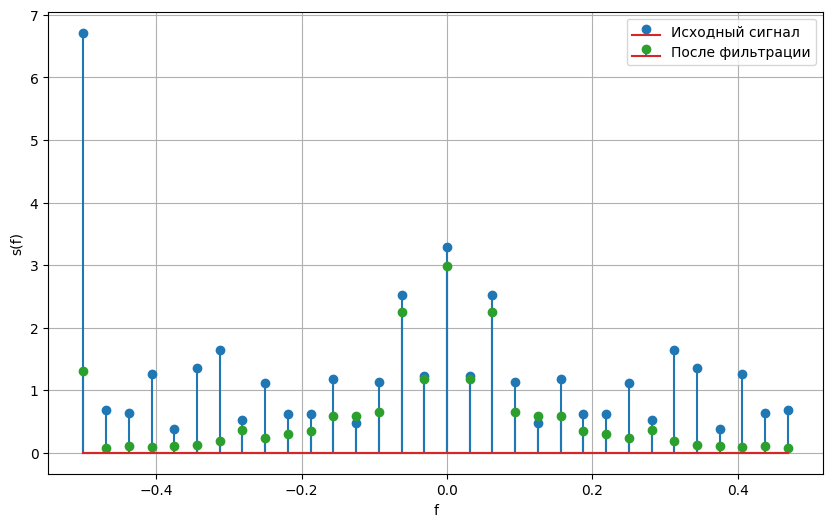

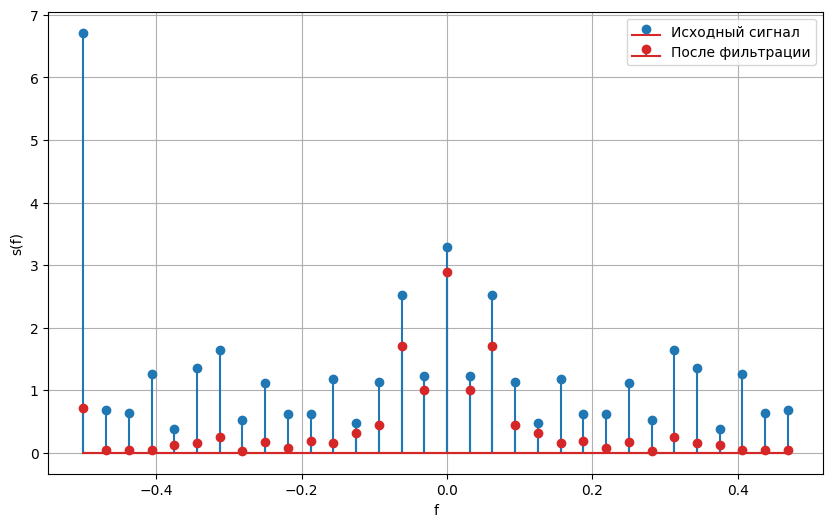

In [80]:
f = fftfreq(N + 1, T)
s5 = np.abs(furie(s5))

plt.figure(figsize=(10, 6))
plt.stem(f, x, label="Исходный сигнал")
plt.stem(f, s5, markerfmt="C2o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


s9 = np.abs(furie(s9))

plt.figure(figsize=(10, 6))
plt.stem(f, x, label="Исходный сигнал")
plt.stem(f, s9, markerfmt="C3o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

#### 7. Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

Как и для $H(\omega)$: область убывания функции(полоса пропускания) тем меньше, чем больше использовалось точек.

#### 8. Повторить п. 4–7 для следующих фильтров:
##### a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
##### b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

**а. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.**

$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$

$$H(\omega) = \frac{e^{i\omega}-e^{-i\omega}}{2i} \cdot i=i\cdot sin(\omega)$$

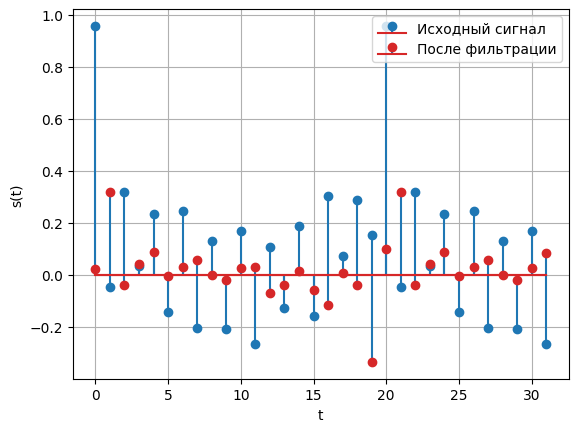

In [81]:
s = [signal(t) for t in t_discrete]
si = np.convolve(s, np.array([-1, 0, 1]), 'same') / 2

plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, si, label="После фильтрации", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()



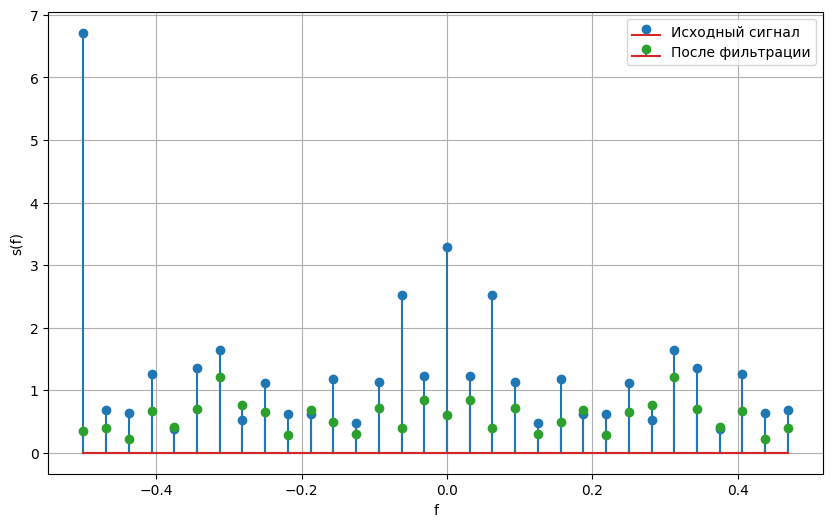

In [82]:
f = fftfreq(N + 1, T)
si = np.abs(furie(si))

plt.figure(figsize=(10, 6))
plt.stem(f, x, label="Исходный сигнал")
plt.stem(f, si, markerfmt="C2o", label="После фильтрации")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка воздействует на поступивший дискретный сигнал следующим образом:

- Низкие и высокие частоты подавляются
- Остальные частоты незначительно подавляются

**b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).**

#### ДЛЯ ФОРМУЛЫ ТРАПЕЦИЙ

$$y_{n+1}=y_{n}+\frac{1}{2}(s_{n}+s_{n+1})$$
$$y_0=0$$


$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$



$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega n}+\frac{1}{2}(e^{i\omega n}+e^{i\omega (n+1)})$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}+\frac{1}{2}e^{i\omega n}+\frac{1}{2}e^{i\omega n}e^{i\omega}$$



$$H(\omega)e^{i\omega}=H(\omega)+\frac{1}{2}+\frac{1}{2}e^{i\omega}$$



$$H(\omega)(e^{i\omega}-1)=\frac{1}{2}+\frac{1}{2}e^{i\omega}$$



$$H(\omega)=\frac{1}{2}\frac{e^{i\omega}+1}{e^{i\omega}-1}$$



$$H(\omega)=\frac{1}{2}\frac{e^{i\omega}+1}{e^{i\omega}-1}\cdot \frac{\frac{1}{2}e^{-\frac{\omega}{2}i}}{\frac{1}{2}e^{-\frac{\omega}{2}i}}$$

$$H(\omega)=\frac{1}{2}\frac{\frac{1}{2}e^{\frac{\omega}{2}i}+\frac{1}{2}e^{-\frac{\omega}{2}i}}{i\big( \frac{1}{2i}e^{\frac{\omega}{2}i}-\frac{1}{2i}e^{-\frac{\omega}{2}i} \big)}$$



$$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$$

#### ДЛЯ ФОРМУЛЫ ПРЯМОУГОЛЬНИКОВ

$$y_{n+1}=y_{n}+s_{n+\frac{1}{2}}$$
$$y_0=0$$


$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$


$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega n}+e^{i\omega (n+\frac{1}{2})}$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}+e^{i\omega n}e^{i\omega \frac{1}{2}}$$



$$H(\omega)e^{i\omega}=H(\omega)+e^{\frac{i\omega}{2}}$$



$$H(\omega)(e^{i\omega}-1)=e^{\frac{i\omega}{2}}$$



$$H(\omega)=\frac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}$$



$$H(\omega)=\frac{1}{e^{\frac{i\omega}{2}}-e^{-\frac{i\omega}{2}}}$$



$$H(\omega)=\frac{1}{cos(\frac{\omega}{2})+i\cdot sin(\frac{\omega}{2})-cos(\frac{\omega}{2})+i\cdot sin(\frac{\omega}{2})}$$



$$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$$

#### ДЛЯ ФОРМУЛЫ СИМПСОНА

$$y_{n+1}=y_{n-1}+\frac{1}{3}(s_{n-1}+4s_{n}+s_{n+1})$$
$$y_0=0$$


$$s_{n}=e^{i\omega n}$$
$$y_{n}=H(\omega)e^{i\omega n}$$


$$H(\omega)e^{i\omega (n+1)}=H(\omega)e^{i\omega (n-1)}+\frac{1}{3}(e^{i\omega (n-1)}+4e^{i\omega n}+e^{i\omega (n+1)})$$

$$H(\omega)e^{i\omega n}e^{i\omega}=H(\omega)e^{i\omega n}e^{-i\omega}+\frac{1}{3}(e^{i\omega n}e^{-i\omega}+4e^{i\omega n}+e^{i\omega n}e^{i\omega})$$



$$H(\omega)e^{i\omega}=H(\omega)e^{-i\omega}+\frac{1}{3}(e^{-i\omega}+4+e^{i\omega})$$


$$H(\omega)(e^{i\omega}-e^{-i\omega})=\frac{1}{3}(e^{-i\omega}+4+e^{i\omega})$$


$$H(\omega)=\frac{1}{3}\frac{e^{-i\omega}+4+e^{i\omega}}{e^{i\omega}-e^{-i\omega}}$$


$$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$$


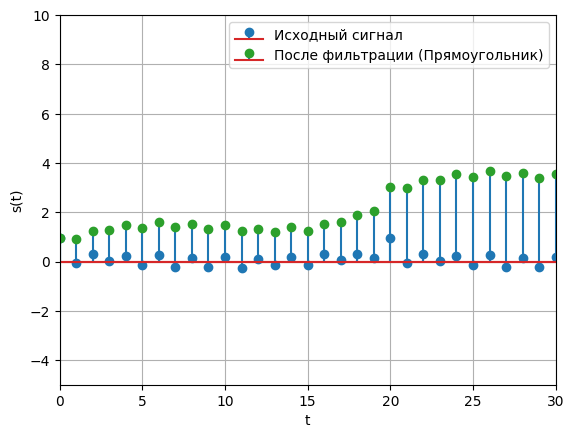

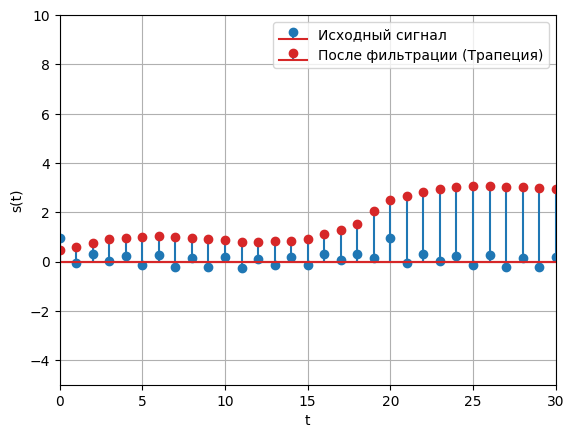

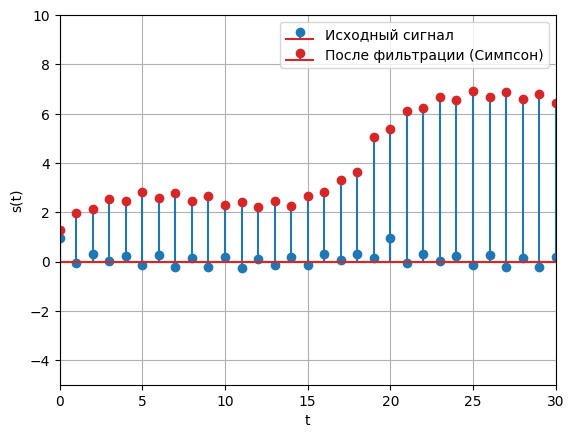

In [85]:
s = [signal(t) for t in t_discrete]

def si(s, name):
    match name:
        case "rectangle":
            result = np.empty(len(s))
            result[0] = s[0]
            for i in range(1, len(s)):
                result[i] = result[i-1] + s[i]
            return result
        case "trapezoid":
            result = np.empty(len(s))
            result[0] = (s[0] + s[1]) / 2
            for i in range(1, len(s)-1):
                result[i] = result[i - 1] + (s[i] + s[i+1]) / 2
            return result
        case "Simpson":
            result = np.empty(len(s))
            result[0] = (0 + 4*s[0] + s[1]) / 3
            for i in range(1, len(s)-1):
                result[i] = result[i-1] + (s[i-1] + s[i] + 4*s[i+1]) / 3
            return result


plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, si(s, "rectangle"), label="После фильтрации (Прямоугольник)", markerfmt="C2o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.xlim(0, 30)
plt.ylim(-5, 10)
plt.legend()
plt.grid()
plt.show()


plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, si(s, "trapezoid"), label="После фильтрации (Трапеция)", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.xlim(0, 30)
plt.ylim(-5, 10)
plt.legend()
plt.grid()
plt.show()

plt.stem(t_discrete, s, label="Исходный сигнал")
plt.stem(t_discrete, si(s, "Simpson"), label="После фильтрации (Симпсон)", markerfmt="C3o")
plt.ylabel("s(t)")
plt.xlabel("t")
plt.xlim(0, 30)
plt.ylim(-5, 10)
plt.legend()
plt.grid()
plt.show()



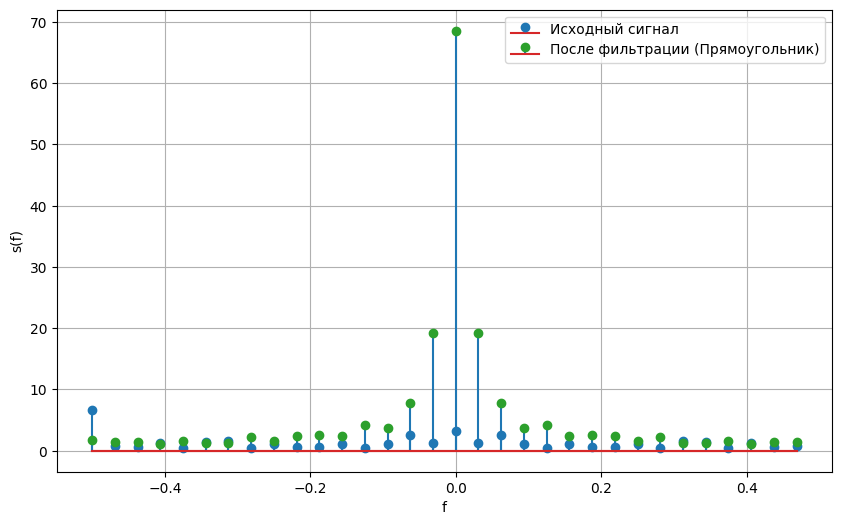

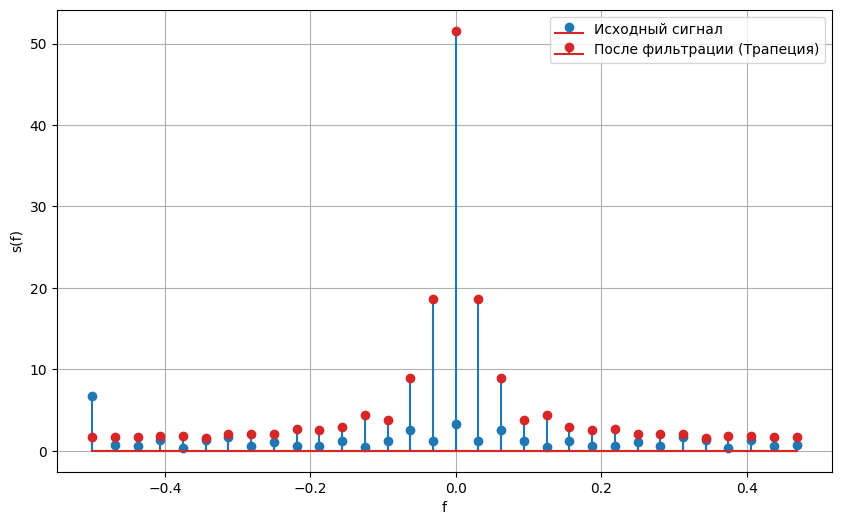

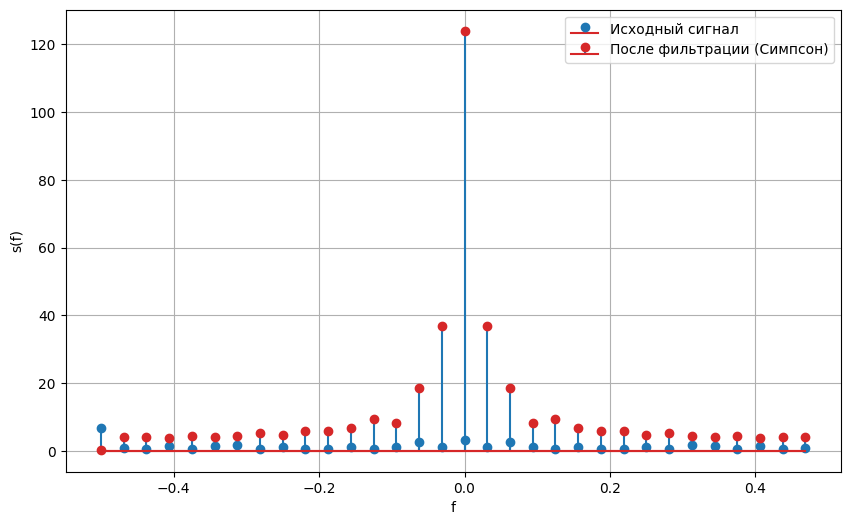

In [84]:
f = fftfreq(N + 1, T)
s_re = np.abs(furie(si(s, "rectangle")))

plt.figure(figsize=(10, 6))
plt.stem(f, x, label="Исходный сигнал")
plt.stem(f, s_re, markerfmt="C2o", label="После фильтрации (Прямоугольник)")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()


s_tr = np.abs(furie(si(s, "trapezoid")))

plt.figure(figsize=(10, 6))
plt.stem(f, x, label="Исходный сигнал")
plt.stem(f, s_tr, markerfmt="C3o", label="После фильтрации (Трапеция)")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

s_si = np.abs(furie(si(s, "Simpson")))

plt.figure(figsize=(10, 6))
plt.stem(f, x, label="Исходный сигнал")
plt.stem(f, s_si, markerfmt="C3o", label="После фильтрации (Симпсон)")
plt.ylabel("s(f)")
plt.xlabel("f")
plt.legend()
plt.grid()
plt.show()

Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона), усиливает поступивший дискретный сигнал следующим образом: трапеция, прямоугольник, Симпсон(в порядке возрастания усиления амплитуды).

## Выводы

В ходе выполнения практической работы выполнена дискретизация аналогового сигнала с шагом T=1. С помощью ДПФ найдены дискретные отсчеты спектра дискретного сигнала. Далее проводилась фильтрация сигнала числовым дифференцирования 1-го порядка и численным интегрированием методами прямоугольника, трапеции, Симпсона. Для каждой фильтрации выведены графики исходного и фильтрованного сигналов, а также спектра. В результате анализа выявлено, что фильтр на основе численного дифферинцирования подавляет сигнал, а на основе численного интегрирования усиливает, причем максимальное усиление для Симпсона, чуть меньше для прямоугольника и минимальный для трапеции 